<a href="https://colab.research.google.com/github/Krishaniplp/Krishaniplp/blob/main/Abduction_Kidnapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kidnapping in Sri Lanka Analysis**

4. Kidnapping

"Kidnapping” means unlawfully detaining a person or persons against their willfor the purpose of demanding for their liberation an illicit gain or any other economic gain or other material benefit; or in order to oblige someone to do or not to do something. “Kidnapping” excludes disputes over child custody.

GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and matplotlib for plotting.

In [1]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.3 MB/s 
     |████████████████████████████████| 16.7 MB 584 kB/s 
     |████████████████████████████████| 6.3 MB 36.7 MB/s 


The challenge of gaining access to geographic information for Sri Lanka is the only significant obstacle to creating maps of Sri Lanka using the Python packages GeoPandas and MatPlotLib. I’ve attempted to solve this problem by scraping geographical data from various sources, sharing it on GitHub, and providing a simple python library geo-nuuuwan for conveniently accessing this data.

Begin by installing geo-nuuuwan

In [2]:
!pip install geo-nuuuwan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 6.3 MB/s 
     |████████████████████████████████| 2.2 MB 53.6 MB/s 
     |████████████████████████████████| 5.2 MB 50.0 MB/s 
     |████████████████████████████████| 140 kB 50.8 MB/s 
     |████████████████████████████████| 384 kB 53.8 MB/s 
     |████████████████████████████████| 139 kB 47.7 MB/s 
     |████████████████████████████████| 139 kB 66.9 MB/s 
     |████████████████████████████████| 138 kB 34.0 MB/s 
     |████████████████████████████████| 138 kB 65.9 MB/s 
     |████████████████████████████████| 138 kB 67.1 MB/s 
     |████████████████████████████████| 138 kB 66.0 MB/s 
     |████████████████████████████████| 138 kB 63.2 MB/s 
     |████████████████████████████████| 153 kB 32.9 MB/s 
     |████████████████████████████████| 137 kB 12.1 MB/s 
     |████████████████████████████████| 136 kB 67.5 MB/s 
     |██████████████████████████

Folium builds on the data manipulation and mapping prowess of the Python ecosystem and the Leaflet.js package. You can manipulate your data with Python and then use folium to display it as a Leaflet map.

In [3]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import pandas as pd
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
import folium
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
from geo import geodata

First, I load the crime data file, and then I arrange the information by District to make it easier to visualize.

In [21]:
sL_crime = pd.DataFrame(pd.read_csv('/content/final_dis.csv'))
sL_crime= sL_crime.sort_values(by=['District'])

Module geodata in geo (geo-nuuuwan) implements method get_region_geodata, which returns geographical data (as a GeoPandas.GeoDataFrame) for some region of Sri Lanka, split by some region. For example, the following snippet returns geographical data for Sri Lanka split by District.

In [8]:
district_geo = geodata.get_region_geodata('LK','district')
district_geo_processed = district_geo[['name','geometry']].sort_values(by=['name'])
district_geo_processed

,name,geometry
13,Ampara,"MULTIPOLYGON (((81.72902 6.54980, 81.72879 6.5..."
16,Anuradhapura,"MULTIPOLYGON (((80.54128 7.83628, 80.53963 7.8..."
4,Badulla,"MULTIPOLYGON (((80.92313 6.68965, 80.92030 6.6..."
18,Batticaloa,"MULTIPOLYGON (((81.79691 7.43905, 81.79596 7.4..."
19,Colombo,"MULTIPOLYGON (((79.89944 6.72178, 79.89896 6.7..."
20,Galle,"MULTIPOLYGON (((80.37651 5.96571, 80.37510 5.9..."
9,Gampaha,"MULTIPOLYGON (((80.06231 6.90864, 80.06090 6.9..."
15,Hambantota,"MULTIPOLYGON (((80.73809 5.98217, 80.73786 5.9..."
22,Jaffna,"MULTIPOLYGON (((79.52984 9.38954, 79.53078 9.3..."
11,Kalutara,"MULTIPOLYGON (((80.29661 6.35119, 80.29897 6.3..."


After that, I combine SL_data and sL_crime_with_district. sl_data name column and sL_crime_with_district District column are used.

In [9]:
crime_merge = sL_crime.merge(district_geo_processed, left_on='District', right_on='name')
crime_merge

,District,Abduction / Kidnapping,Arson,Mischief over Rs.5000/=,H.B. & Theft,Grevious Hurt,Hurt by Knife etc.,Homicide/Abet. To commit suicide,Attempted Homicide,Rape / Incest,...,Theft of Property including praedial produce over Rs. 5000/ & cycle cattle theft irrrespective of their value,Counterfeiting Currency,Offences against State,Cruelty to Children & sexual exploitation of children,Procuration / Trafficking,Offences under the Offensive weapons Act.,Possession of Automatic or Repeater Shot Guns,"Offences under the Poisons, Opium & Dangerous Drugs",name,geometry
0,Ampara,16,41,37,241,98,73,19,7,47,...,187,0,1,2,2,13,1,6,Ampara,"MULTIPOLYGON (((81.72902 6.54980, 81.72879 6.5..."
1,Anuradhapura,51,21,92,720,135,69,33,13,117,...,425,3,0,27,0,10,0,4,Anuradhapura,"MULTIPOLYGON (((80.54128 7.83628, 80.53963 7.8..."
2,Badulla,26,18,27,402,68,86,19,16,54,...,164,0,0,6,0,2,0,3,Badulla,"MULTIPOLYGON (((80.92313 6.68965, 80.92030 6.6..."
3,Batticaloa,21,30,45,237,39,69,9,5,40,...,269,1,4,10,1,16,2,0,Batticaloa,"MULTIPOLYGON (((81.79691 7.43905, 81.79596 7.4..."
4,Colombo,108,30,164,3649,149,345,76,17,87,...,3287,12,2,33,4,38,5,326,Colombo,"MULTIPOLYGON (((79.89944 6.72178, 79.89896 6.7..."
5,Galle,60,36,65,867,83,146,48,22,128,...,472,2,0,25,1,23,3,55,Galle,"MULTIPOLYGON (((80.37651 5.96571, 80.37510 5.9..."
6,Gampaha,96,55,146,3664,143,382,83,17,159,...,2106,5,0,59,2,23,1,75,Gampaha,"MULTIPOLYGON (((80.06231 6.90864, 80.06090 6.9..."
7,Hambantota,43,38,44,362,33,87,43,10,77,...,252,0,0,4,1,4,1,35,Hambantota,"MULTIPOLYGON (((80.73809 5.98217, 80.73786 5.9..."
8,Jaffna,31,6,24,191,46,80,28,3,39,...,324,1,0,6,0,5,1,1,Jaffna,"MULTIPOLYGON (((79.52984 9.38954, 79.53078 9.3..."
9,Kalutara,66,33,54,1241,46,149,47,13,90,...,767,0,0,32,0,12,2,60,Kalutara,"MULTIPOLYGON (((80.29661 6.35119, 80.29897 6.3..."


I only consider about Kidnapping cases, then I extract only Abduction / Kidnapping related colmns and district and geometry column.

In [10]:
crime_kidnap = crime_merge.drop(['name'], axis=1)[['District','Abduction / Kidnapping','geometry']]
crime_kidnap

,District,Abduction / Kidnapping,geometry
0,Ampara,16,"MULTIPOLYGON (((81.72902 6.54980, 81.72879 6.5..."
1,Anuradhapura,51,"MULTIPOLYGON (((80.54128 7.83628, 80.53963 7.8..."
2,Badulla,26,"MULTIPOLYGON (((80.92313 6.68965, 80.92030 6.6..."
3,Batticaloa,21,"MULTIPOLYGON (((81.79691 7.43905, 81.79596 7.4..."
4,Colombo,108,"MULTIPOLYGON (((79.89944 6.72178, 79.89896 6.7..."
5,Galle,60,"MULTIPOLYGON (((80.37651 5.96571, 80.37510 5.9..."
6,Gampaha,96,"MULTIPOLYGON (((80.06231 6.90864, 80.06090 6.9..."
7,Hambantota,43,"MULTIPOLYGON (((80.73809 5.98217, 80.73786 5.9..."
8,Jaffna,31,"MULTIPOLYGON (((79.52984 9.38954, 79.53078 9.3..."
9,Kalutara,66,"MULTIPOLYGON (((80.29661 6.35119, 80.29897 6.3..."


Then after I got total Abduction / Kidnapping cases.

In [11]:
col_list= ['Abduction / Kidnapping']
crime_kidnap['Sum_violances'] = crime_kidnap[col_list].sum(axis=1)
crime_kidnap

,District,Abduction / Kidnapping,geometry,Sum_violances
0,Ampara,16,"MULTIPOLYGON (((81.72902 6.54980, 81.72879 6.5...",16
1,Anuradhapura,51,"MULTIPOLYGON (((80.54128 7.83628, 80.53963 7.8...",51
2,Badulla,26,"MULTIPOLYGON (((80.92313 6.68965, 80.92030 6.6...",26
3,Batticaloa,21,"MULTIPOLYGON (((81.79691 7.43905, 81.79596 7.4...",21
4,Colombo,108,"MULTIPOLYGON (((79.89944 6.72178, 79.89896 6.7...",108
5,Galle,60,"MULTIPOLYGON (((80.37651 5.96571, 80.37510 5.9...",60
6,Gampaha,96,"MULTIPOLYGON (((80.06231 6.90864, 80.06090 6.9...",96
7,Hambantota,43,"MULTIPOLYGON (((80.73809 5.98217, 80.73786 5.9...",43
8,Jaffna,31,"MULTIPOLYGON (((79.52984 9.38954, 79.53078 9.3...",31
9,Kalutara,66,"MULTIPOLYGON (((80.29661 6.35119, 80.29897 6.3...",66


I converted pandas Dataframe to GeoPandas Dataframe for plotting on the Sri Lankan map.

Parameter crs = "EPSG:4326" denotes Coordinate Reference System of the geometry objects.

Finally I plot the map

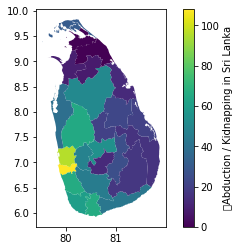

In [12]:
crime_kidnap_SL = gp.GeoDataFrame(crime_kidnap, crs = "EPSG:4326")
crime_kidnap_SL.plot(column = 'Abduction / Kidnapping', legend = True, legend_kwds = {'label': "	Abduction / Kidnapping in Sri Lanka", 'orientation': "vertical"});

In [13]:
colombo_cities = geodata.get_region_geodata('LK-11','dsd')
colombo_cities

,id,name,country_id,province_id,district_id,dsd_id,ed_id,area,population,hasc,centroid_altitude,geometry
31,LK-1121,Maharagama,LK,LK-1,LK-11,LK-1121,EC-01,38.0,196423,LK.CO.MA,30,"MULTIPOLYGON (((79.98712 6.83773, 79.98500 6.8..."
40,LK-1136,Kesbewa,LK,LK-1,LK-11,LK-1136,EC-01,64.0,245232,LK.CO.KE,14,"MULTIPOLYGON (((79.92301 6.82715, 79.92419 6.8..."
92,LK-1127,Thimbirigasyaya,LK,LK-1,LK-11,LK-1127,EC-01,24.0,237748,LK.CO.TH,12,"MULTIPOLYGON (((79.85937 6.86319, 79.85937 6.8..."
100,LK-1131,Ratmalana,LK,LK-1,LK-11,LK-1131,EC-01,13.0,95506,LK.CO.RA,10,"MULTIPOLYGON (((79.87610 6.80600, 79.87492 6.8..."
133,LK-1106,Kolonnawa,LK,LK-1,LK-11,LK-1106,EC-01,28.0,191687,LK.CO.KO,10,"MULTIPOLYGON (((79.94469 6.91216, 79.94304 6.9..."
142,LK-1130,Dehiwala,LK,LK-1,LK-11,LK-1130,EC-01,8.0,88962,LK.CO.DM,21,"MULTIPOLYGON (((79.87162 6.84596, 79.87044 6.8..."
161,LK-1133,Moratuwa,LK,LK-1,LK-11,LK-1133,EC-01,20.0,168280,LK.CO.MO,24,"MULTIPOLYGON (((79.90014 6.72021, 79.89991 6.7..."
177,LK-1109,Kaduwela,LK,LK-1,LK-11,LK-1109,EC-01,88.0,252041,LK.CO.KA,11,"MULTIPOLYGON (((79.97251 6.86554, 79.97015 6.8..."
205,LK-1112,Homagama,LK,LK-1,LK-11,LK-1112,EC-01,121.0,237905,LK.CO.HO,28,"MULTIPOLYGON (((79.97816 6.76134, 79.97793 6.7..."
239,LK-1124,Sri Jayawardanapura Kotte,LK,LK-1,LK-11,LK-1124,EC-01,17.0,107883,LK.CO.SJ,5,"MULTIPOLYGON (((79.90226 6.87612, 79.90321 6.8..."


In [14]:
kidnapcounts = [10,13,34,12,5,37,9,5,7,2,6,8,53]
colombo_cities["kidnapcounts"] = kidnapcounts
colombo_cities

,id,name,country_id,province_id,district_id,dsd_id,ed_id,area,population,hasc,centroid_altitude,geometry,kidnapcounts
31,LK-1121,Maharagama,LK,LK-1,LK-11,LK-1121,EC-01,38.0,196423,LK.CO.MA,30,"MULTIPOLYGON (((79.98712 6.83773, 79.98500 6.8...",10
40,LK-1136,Kesbewa,LK,LK-1,LK-11,LK-1136,EC-01,64.0,245232,LK.CO.KE,14,"MULTIPOLYGON (((79.92301 6.82715, 79.92419 6.8...",13
92,LK-1127,Thimbirigasyaya,LK,LK-1,LK-11,LK-1127,EC-01,24.0,237748,LK.CO.TH,12,"MULTIPOLYGON (((79.85937 6.86319, 79.85937 6.8...",34
100,LK-1131,Ratmalana,LK,LK-1,LK-11,LK-1131,EC-01,13.0,95506,LK.CO.RA,10,"MULTIPOLYGON (((79.87610 6.80600, 79.87492 6.8...",12
133,LK-1106,Kolonnawa,LK,LK-1,LK-11,LK-1106,EC-01,28.0,191687,LK.CO.KO,10,"MULTIPOLYGON (((79.94469 6.91216, 79.94304 6.9...",5
142,LK-1130,Dehiwala,LK,LK-1,LK-11,LK-1130,EC-01,8.0,88962,LK.CO.DM,21,"MULTIPOLYGON (((79.87162 6.84596, 79.87044 6.8...",37
161,LK-1133,Moratuwa,LK,LK-1,LK-11,LK-1133,EC-01,20.0,168280,LK.CO.MO,24,"MULTIPOLYGON (((79.90014 6.72021, 79.89991 6.7...",9
177,LK-1109,Kaduwela,LK,LK-1,LK-11,LK-1109,EC-01,88.0,252041,LK.CO.KA,11,"MULTIPOLYGON (((79.97251 6.86554, 79.97015 6.8...",5
205,LK-1112,Homagama,LK,LK-1,LK-11,LK-1112,EC-01,121.0,237905,LK.CO.HO,28,"MULTIPOLYGON (((79.97816 6.76134, 79.97793 6.7...",7
239,LK-1124,Sri Jayawardanapura Kotte,LK,LK-1,LK-11,LK-1124,EC-01,17.0,107883,LK.CO.SJ,5,"MULTIPOLYGON (((79.90226 6.87612, 79.90321 6.8...",2


after that i add a new column as kidnap counts in cities of colombo district

In [15]:
colombo_kidnap_SL = gp.GeoDataFrame(colombo_cities, crs = "EPSG:4326")

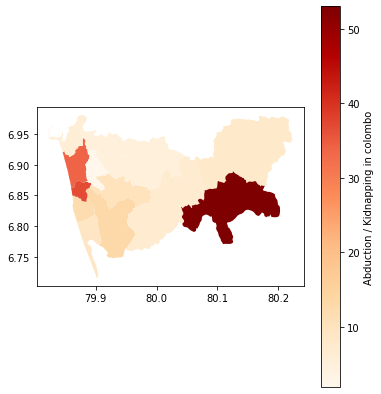

In [16]:
colombo_kidnap_SL.plot(column = 'kidnapcounts', legend = True , legend_kwds = {'label': "Abduction / Kidnapping in colombo", 'orientation': "vertical"},cmap='OrRd',figsize=(6, 7));

This is the plot of most kidnap cases happened district.

In [17]:
m = folium.Map(location=[6.8664, 80.0166])
m
folium.Circle(
    radius=5000,
    location=[6.8453634, 80.1037721],
    popup='Sri Lanka',
    color='#3186cc',
    fill=True,
    fill_color='green'
).add_to(m)
m

In [18]:
import folium
from folium import plugins
from folium.plugins import HeatMap

In [19]:
lst = [[6.8427248, 80.0918541, 2], [6.8430944, 80.0914493, 1],
       [6.845363, 80.103772, 5], [6.845363, 80.103772, 3]]
minu_homo = pd.DataFrame(lst, columns =['lat', 'lon','count'])
m = folium.Map([6.8427248, 80.0918541], zoom_start=16)
minu_homo

,lat,lon,count
0,6.842725,80.091854,2
1,6.843094,80.091449,1
2,6.845363,80.103772,5
3,6.845363,80.103772,3


In [20]:
HeatMap(minu_homo, 
        min_opacity=0.4,
        blur = 18
               ).add_to(folium.FeatureGroup(name='Heat Map').add_to(m))
folium.LayerControl().add_to(m)
m